In [1]:
import networkx
import networks as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\qwqwh\AppData\Local\Temp\ipykernel_15884\607370898.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
from adiaframe import Hamiltonian
from adiaframe import utils_c as uc

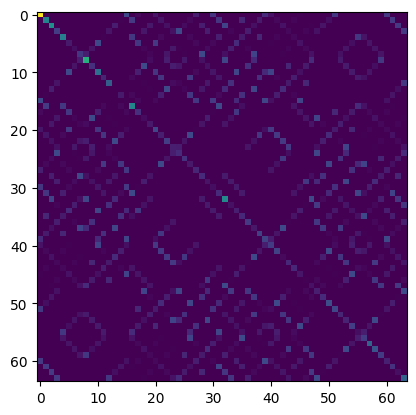

In [3]:
from random import random
# Test with real Hamiltonian terms
pstrs = pd.read_csv("H3+-2.1_node.csv")["Pstring"]
pauli_sample = {}
for p in pstrs:
    pauli_sample[p] = random()
H = Hamiltonian.p_poly_to_H(pauli_sample)
plt.imshow(np.abs(H))

In [4]:
for r in H:
    print(r)

[[11.26680192+0.j  0.        +0.j  0.        +0.j  0.        +0.j
   0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j
   0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j
   0.        +0.j  0.        +0.j  0.        +0.j -2.48839034+0.j
   0.        +0.j  0.28225801+0.j  0.        +0.j  0.        +0.j
   0.64928056+0.j  0.        +0.j  0.        +0.j  0.        +0.j
   0.        +0.j  0.        +0.j  0.        +0.j -0.92984041+0.j
   0.        +0.j  0.        +0.j -1.69173853+0.j  0.        +0.j
   0.        +0.j  0.        +0.j -0.02845996+0.j  0.        +0.j
   0.        +0.j  0.        +0.j  0.        +0.j -1.38303585+0.j
   0.56356236+0.j  0.        +0.j  0.        +0.j  0.        +0.j
   0.        +0.j  0.06176136+0.j  0.        +0.j  0.        +0.j
   0.        +0.j  0.        +0.j  0.        +0.j -1.83671853+0.j
   0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j
   0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j
  -1.85727

In [44]:
hamiltonian = Hamiltonian(H, pauli_basis=pauli_sample, commute_map=True)
hamiltonian.local_decomposition.tail(10)

,Pstring,type,Z,X,Coef
56,YZYXZX,2,58,45,0.644012+0.000000j
57,YZYYZY,2,63,45,0.027179+0.000000j
58,XXIIYY,2,3,51,0.286292+0.000000j
59,XYIIYX,2,18,51,0.338200+0.000000j
60,YXIIXY,2,33,51,0.842133+0.000000j
61,YYIIXX,2,48,51,0.370094+0.000000j
62,XXYYII,2,12,60,0.116307+0.000000j
63,XYYXII,2,24,60,0.404824+0.000000j
64,YXXYII,2,36,60,0.522785+0.000000j
65,YYXXII,2,48,60,0.813354+0.000000j


In [6]:
hamiltonian.commute_map

,source,target,Zs,Xs,Zt,Xt,commute
0,IIIIII,IIIIIZ,0,0,1,0,1
1,IIIIII,IIIIZI,0,0,2,0,1
2,IIIIII,IIIIZZ,0,0,3,0,1
3,IIIIII,IIIZII,0,0,4,0,1
4,IIIIII,IIIZIZ,0,0,5,0,1
...,...,...,...,...,...,...,...
2140,YZZYXX,YZZZYZ,60,39,63,34,0
2141,YZZYXX,YZYYZY,60,39,63,45,0
2142,YZYZII,YZZZYZ,60,40,63,34,0
2143,YZYZII,YZYYZY,60,40,63,45,0


In [7]:
hamiltonian.graph_edge

,source,target,Zs,Xs,Zt,Xt,commute
65,IIIIIZ,IIIIZI,1,0,2,0,1
66,IIIIIZ,IIIIZZ,1,0,3,0,1
67,IIIIIZ,IIIZII,1,0,4,0,1
68,IIIIIZ,IIIZIZ,1,0,5,0,1
69,IIIIIZ,IIIZZI,1,0,6,0,1
...,...,...,...,...,...,...,...
2140,YZZYXX,YZZZYZ,60,39,63,34,0
2141,YZZYXX,YZYYZY,60,39,63,45,0
2142,YZYZII,YZZZYZ,60,40,63,34,0
2143,YZYZII,YZYYZY,60,40,63,45,0


### Weight function applying

In [8]:
from adiaframe.utils import get_basis_weight

In [9]:
hamiltonian.applying_weight_func(
    get_basis_weight, 
    ["source", "target"], 
    "basis_wieght", inplace=True)

In [10]:
hamiltonian.graph_edge

,source,target,Zs,Xs,Zt,Xt,commute,basis_wieght
65,IIIIIZ,IIIIZI,1,0,2,0,1,0.000000
66,IIIIIZ,IIIIZZ,1,0,3,0,1,0.000000
67,IIIIIZ,IIIZII,1,0,4,0,1,0.000000
68,IIIIIZ,IIIZIZ,1,0,5,0,1,0.000000
69,IIIIIZ,IIIZZI,1,0,6,0,1,0.000000
...,...,...,...,...,...,...,...,...
2140,YZZYXX,YZZZYZ,60,39,63,34,0,1.000000
2141,YZZYXX,YZYYZY,60,39,63,45,0,1.000000
2142,YZYZII,YZZZYZ,60,40,63,34,0,0.666667
2143,YZYZII,YZYYZY,60,40,63,45,0,0.666667


## Test with Network optimization algorithm

In [11]:
qubit = hamiltonian.qubit_num
print(qubit)

6


In [12]:
hamiltonian.commute_map.columns

Index(['source', 'target', 'Zs', 'Xs', 'Zt', 'Xt', 'commute', 'basis_wieght'], dtype='object')

### Edge weight calculation

$$\mathcal{H} = - \mu_0  \sum Z_i + \mu_1 \sum_{i <j} h_{ij} Z_iZ_j + \mu_2 \sum_{i<j}w_{ij}Z_{i}Z_{j}$$

where, $h_{ij} = 0, 1$ and $0 \leq w_{ij} \leq 3$.

Constraints

1. $max(h_{ij}) |\mu_1| > N |\mu_0| $
2. $|\mu_0| > \frac{1}{2}N(N-1) |\mu_2| * max(w_{ij})$

In [13]:
from adiaframe import graph_op

In [14]:
mus = graph_op.mu_cal(0.1, hamiltonian.qubit_num) # mu0. mu1, mu2

In [15]:
G_b = graph_op.get_binary_graph(hamiltonian)
G_w = graph_op.get_basis_weight_graph(hamiltonian, mus) 
# This function automatically generate the above basis tranformation weight 

c:\Users\qwqwh\Documents\GitHub\OpenHackathon\module\AdiaFrame\adiaframe\graph_op.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edge_df["weight"] = mu2*basis_column + mu1*commute_column


Commuting Map of the Hamiltonian Pauli-nodes


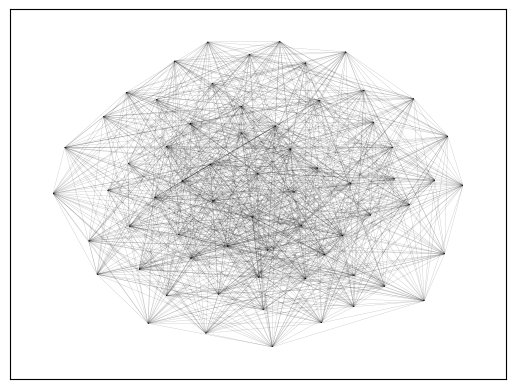

In [34]:
print("Commuting Map of the Hamiltonian Pauli-nodes")
fig, ax = plt.subplots(1,1)

pos = networkx.spring_layout(G_b)
edges = networkx.draw_networkx_edges(G_b, pos, width=0.2, alpha=0.3)


Text(0, 0.5, 'X family')

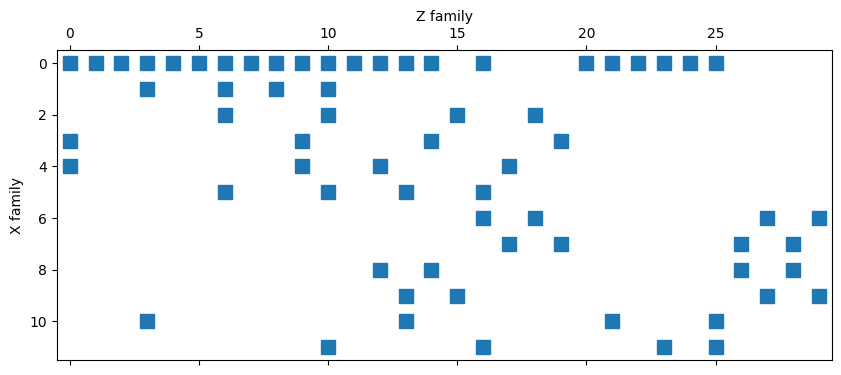

In [40]:
fig, ax = plt.subplots(1,1, figsize=(10, 10))
ax.spy(hamiltonian.latin_matrix, markersize=10)
ax.set_xlabel("Z family")
ax.xaxis.set_label_position('top') 
ax.set_ylabel("X family")

## Commuting partition calculation



###

## Classic version

In [32]:
from copy import deepcopy
from networkx.algorithms.approximation import max_clique 
# It only works for binary graph indicating commuting map.

In [17]:
g_classic = deepcopy(G_b)
max_cliques = []
while len(g_classic.nodes) >0:
    clique = max_clique(g_classic)
    max_cliques.append(clique)
    for node in clique:
        g_classic.remove_node(node)

In [19]:
print("Classic Clique solver:")
print("Partition:", len(max_cliques))
for c in max_cliques:
    print(len(c), end=", ")
print("============================================")
for c in max_cliques:
    print(c)

Classic Clique solver:
Partition: 12
21, 6, 7, 6, 6, 4, 4, 4, 2, 2, 2, 1, ============================================
{'ZZIIII', 'IZIIZI', 'IIIZZI', 'IZIIIZ', 'IIIIIZ', 'IIIZIZ', 'IZIIII', 'IZIZII', 'ZIZIII', 'IIIZII', 'IIZIIZ', 'ZIIIZI', 'IIZIII', 'ZIIIIZ', 'IIZIZI', 'IIZZII', 'ZIIIII', 'IIIIZZ', 'IZZIII', 'ZIIZII', 'IIIIZI'}
{'IIXYYX', 'IXXYYI', 'IIYYXX', 'IXIZZX', 'IXZZIX', 'IXYYXI'}
{'IYZYZI', 'XYYXII', 'IXZXZI', 'XXYYII', 'YZYIIZ', 'XZXIIZ', 'YXXYII'}
{'XZXYZY', 'IXIXII', 'IIXXYY', 'XXIIYY', 'IYIZZY', 'YZZYXX'}
{'IYXXYI', 'YXIIXY', 'IXYIYX', 'IIYXXY', 'XZXZII', 'YZZIYI'}
{'XZZXYY', 'IYIYII', 'YYIIXX', 'YZYXZX'}
{'IYYXXI', 'IXXIXX', 'YZZZYZ', 'XZZIXI'}
{'IYZZIY', 'XZXXZX', 'YZZXXY', 'YYXXII'}
{'XZZYYX', 'YZYYZY'}
{'XYIIYX', 'IYXIXY'}
{'XZZZXZ', 'IYYIYY'}
{'YZYZII'}


## Quantum QUBO optimizer(D-Wave)

In [ ]:
def get_mark(sampleset, i=0):
    return list(pd.Series(list(sampleset.lowest())[i].keys())[sampleset.lowest().record[i][0].astype(bool)])


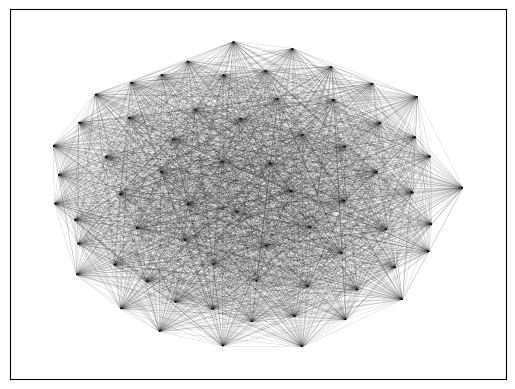

## Kurita et al

## Hyunseong's basis transform weights

## Combination with Pauli-frame method

How to align 
S, H, CNOT weight?

## D-Wave method